<a href="https://colab.research.google.com/github/tensorbytes0202/Machine-learning/blob/main/mean_and_median_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df =pd.read_csv('/content/titanic_toy.csv')

In [ ]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [ ]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [ ]:
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [ ]:
X_train.isnull().mean()

,0
Age,0.196629
Fare,0.050562
Family,0.000000


ek mean_age name ka column banaya h and ek median_age name ka column banaya h usme age ka median and mean store kar diya h same mene fare wale col ke sath kara h

In [ ]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

ab mene X_train me age_medainand age_mena col banaya h or usme median and mean store kar diya h using fillna function

In [ ]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

see there is one nana value which now replaced by age_mena and age_median

In [ ]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
771,48.0,7.8542,0,48.0,48.000000,7.8542,7.854200
237,8.0,26.2500,2,8.0,8.000000,26.2500,26.250000
330,NaN,23.2500,2,28.0,29.498846,23.2500,23.250000
789,46.0,79.2000,0,46.0,46.000000,79.2000,79.200000
562,28.0,NaN,0,28.0,28.000000,14.4000,32.517788


In [ ]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225
Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2637.01248167777
Fare Variance after mean imputation:  2621.2323749512393


isme ye h ki distribution me kitna change aa raha h

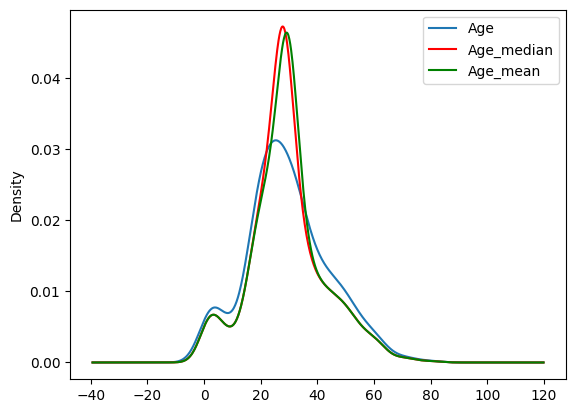

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Fare col me kya hua h na ki bhot kam change aaya h median and mean value me kyuki fare col me bhot kam missing value th isliye

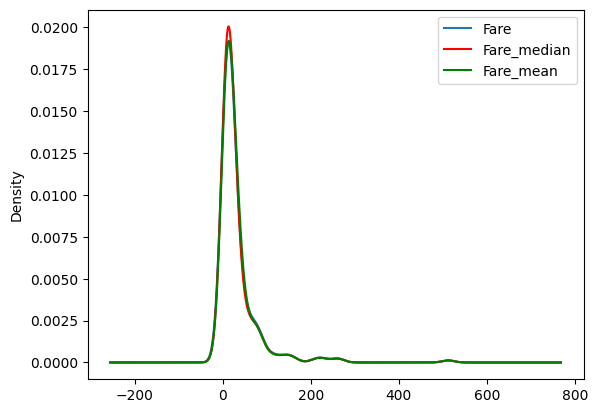

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

cov is covarience

In [ ]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


correlation

In [ ]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088944
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204536,0.204981
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.089416,0.091145
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.084346,0.085941
Fare_median,0.087232,1.000000,0.204536,0.089416,0.084346,1.000000,0.997003
Fare_mean,0.088944,1.000000,0.204981,0.091145,0.085941,0.997003,1.000000


<Axes: >

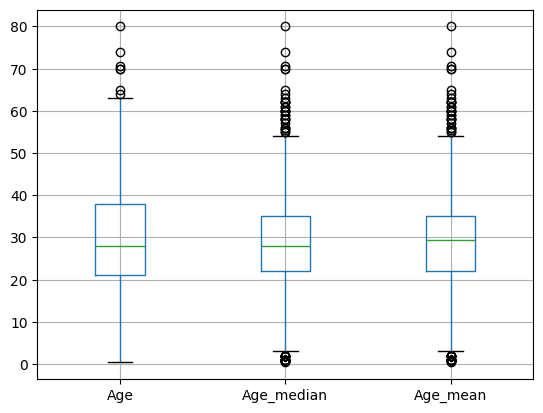

In [ ]:

X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

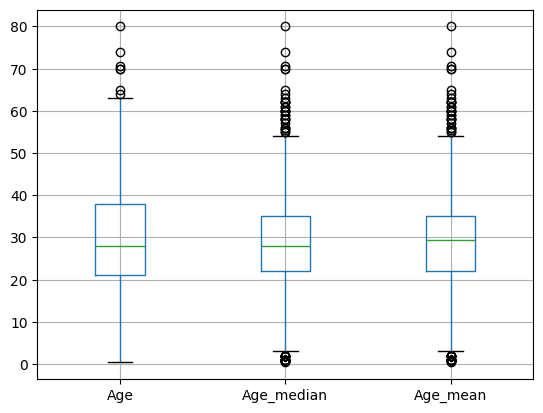

In [ ]:

X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

Using sklearn

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [ ]:

trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [ ]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [ ]:
X_train

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]])